In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [19]:
# Carga desde un archivo .xlsx sin indice
Milan = pd.read_csv('../ValoresAtipicosMilan.csv')

In [22]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [23]:
#Calculamos el numero total de la población "n"

Milan['accommodates'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [24]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['accommodates'].max()
Min = Milan['accommodates'].min()
Limites = [Min, Max]
Limites

[1.0, 7.0]

In [25]:
# Calculamos el rango R
R = Max - Min
R

6.0

In [ ]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [27]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.38241817134564404

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [28]:
# Categorización de variables
intervalos = np.linspace (1.0, 7.0, 16)
intervalos

array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
       6.2, 6.6, 7. ])

In [30]:
# Creamos las categorías
categorias = [ 
"Individual", 
"Pareja", 
"Pareja estándar",
"Grupo", 
"Grupo pequeño", 
"Familiar",
"Familiar grande",
"Grupo mediano",
"Grupo grande",
"Grupo extra grande",
"Alojamiento amplio",
"Alojamiento grande",
"Alojamiento muy grande",
"Alojamiento extendido",
"Alojamiento máximo" ]

In [31]:
# Creamos las ctegorias en la columna numerica
Milan ['accommodates'] = pd.cut ( x = Milan  ['accommodates'], bins = intervalos, labels = categorias )
Milan ['accommodates']

0                       NaN
1             Grupo mediano
2             Grupo mediano
3        Grupo extra grande
4           Pareja estándar
                ...        
23700         Grupo mediano
23701       Pareja estándar
23702       Pareja estándar
23703         Grupo mediano
23704         Grupo mediano
Name: accommodates, Length: 23705, dtype: category
Categories (15, object): ['Individual' < 'Pareja' < 'Pareja estándar' < 'Grupo' ... 'Alojamiento grande' < 'Alojamiento muy grande' < 'Alojamiento extendido' < 'Alojamiento máximo']

In [32]:
table1 = freq_tbl(Milan['accommodates'])
table1

,accommodates,frequency,percentage,cumulative_perc
0,Pareja estándar,9048,0.381692,0.401402
1,Grupo mediano,7726,0.325923,0.744155
2,Grupo pequeño,2854,0.120397,0.870769
3,Alojamiento muy grande,1340,0.056528,0.930216
4,Grupo extra grande,1056,0.044548,0.977064
5,Familiar,361,0.015229,0.993079
6,Alojamiento máximo,156,0.006581,1.000000
7,Individual,0,0.000000,1.000000
8,Pareja,0,0.000000,1.000000
9,Grupo,0,0.000000,1.000000


In [34]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,accommodates,frequency
0,Pareja estándar,9048
1,Grupo mediano,7726
2,Grupo pequeño,2854
3,Alojamiento muy grande,1340
4,Grupo extra grande,1056
5,Familiar,361
6,Alojamiento máximo,156
7,Individual,0
8,Pareja,0
9,Grupo,0


In [35]:
Filtro = table2[ table2['frequency'] >= 94]
Filtro

,accommodates,frequency
0,Pareja estándar,9048
1,Grupo mediano,7726
2,Grupo pequeño,2854
3,Alojamiento muy grande,1340
4,Grupo extra grande,1056
5,Familiar,361
6,Alojamiento máximo,156


In [36]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('accommodates')
Filtro_index

,frequency
accommodates,
Pareja estándar,9048
Grupo mediano,7726
Grupo pequeño,2854
Alojamiento muy grande,1340
Grupo extra grande,1056
Familiar,361
Alojamiento máximo,156


<Axes: xlabel='accommodates'>

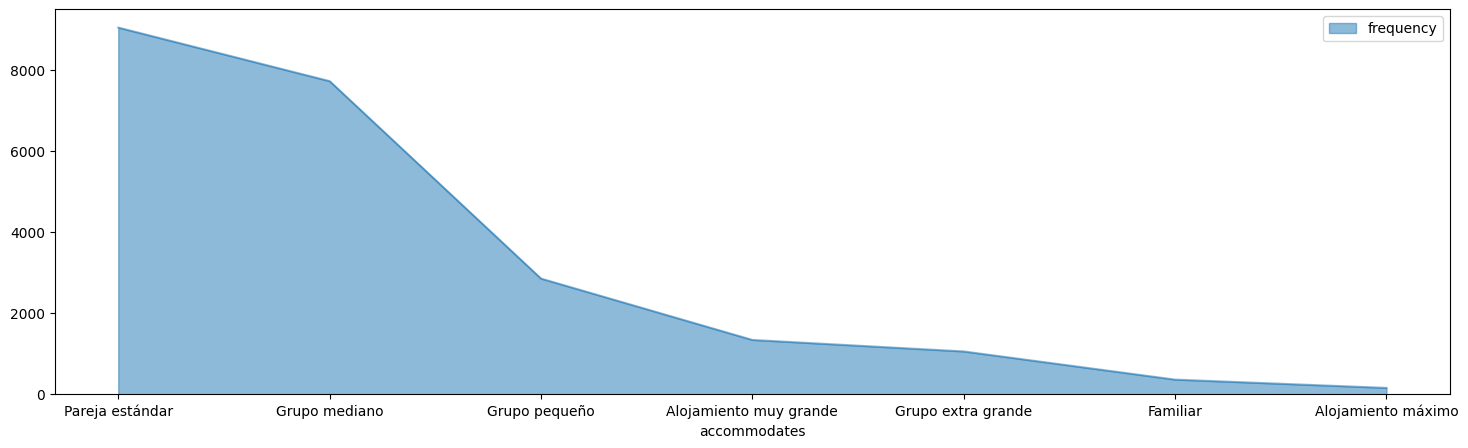

In [37]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (18,5), alpha = 0.5)